In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [35]:
reeses = cv2.imread('../Computer-Vision-with-Python/DATA/reeses_puffs.png',0)
cereal = cv2.imread('../Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

In [37]:
sift = cv2.SIFT_create()

In [38]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereal,None)

In [39]:
bf = cv2.BFMatcher()

In [40]:
matches = bf.knnMatch(des1, des2, k=2)

In [57]:
good = [] # good matches (less distance == better match)

for match1, match2 in matches:
    # ratio test:
    if match1.distance < 0.5*match2.distance: # match1 < 75% match2
        good.append([match1])

In [58]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,good,None,flags=2)

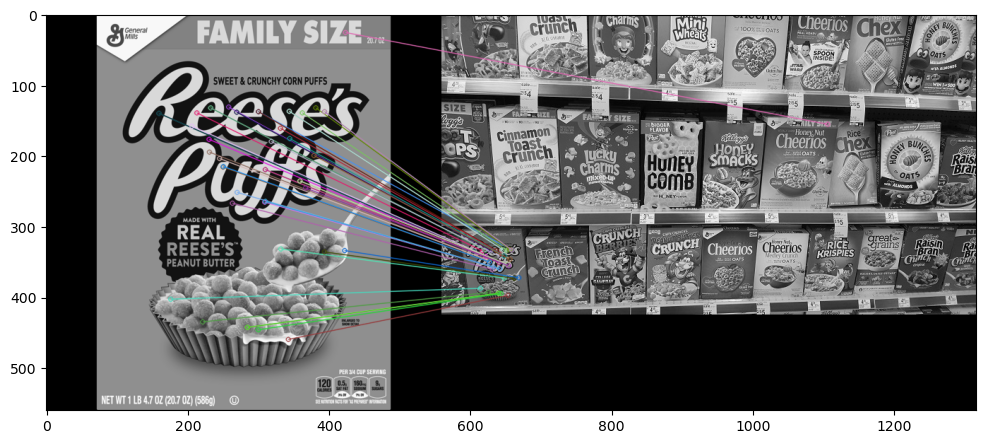

In [59]:
display(sift_matches)

In [66]:
# FLANN BASED MATCHING - faster than BF; worse matching

In [67]:
sift = cv2.SIFT_create()

In [68]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereal,None)

In [72]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [73]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [101]:
matches = flann.knnMatch(des1,des2,k=2)

# optional mask
matchesMask = [[0,0] for i in range(len(matches))]

In [103]:
# good = []

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.5*match2.distance:
        # good.append([match1])
        matchesMask[i] = [1,0]

In [104]:
good

[[< cv2.DMatch 0x7f91b7850db0>],
 [< cv2.DMatch 0x7f91b7850df0>],
 [< cv2.DMatch 0x7f91b77450b0>],
 [< cv2.DMatch 0x7f91b7742730>],
 [< cv2.DMatch 0x7f91b773e0f0>],
 [< cv2.DMatch 0x7f91b773ec30>],
 [< cv2.DMatch 0x7f91b7777d70>],
 [< cv2.DMatch 0x7f91b7777eb0>],
 [< cv2.DMatch 0x7f91b78b50f0>],
 [< cv2.DMatch 0x7f91b78b5130>],
 [< cv2.DMatch 0x7f91b78a14f0>],
 [< cv2.DMatch 0x7f91b78a1af0>],
 [< cv2.DMatch 0x7f91b78a1cb0>],
 [< cv2.DMatch 0x7f91b7895630>],
 [< cv2.DMatch 0x7f91b7895e70>],
 [< cv2.DMatch 0x7f91b789b730>],
 [< cv2.DMatch 0x7f91b789b7f0>],
 [< cv2.DMatch 0x7f91b78b0830>],
 [< cv2.DMatch 0x7f91b78b0870>],
 [< cv2.DMatch 0x7f91b774d790>],
 [< cv2.DMatch 0x7f91b774d850>],
 [< cv2.DMatch 0x7f91b774d8d0>],
 [< cv2.DMatch 0x7f91b774df90>],
 [< cv2.DMatch 0x7f91b788d0d0>],
 [< cv2.DMatch 0x7f91b788d110>],
 [< cv2.DMatch 0x7f91b788d150>],
 [< cv2.DMatch 0x7f91b788d950>],
 [< cv2.DMatch 0x7f91b789c650>],
 [< cv2.DMatch 0x7f91b789c710>],
 [< cv2.DMatch 0x7f91b78a4490>],
 [< cv2.DM

In [105]:
draw_params=dict(matchColor = (0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,matches,None,**draw_params)

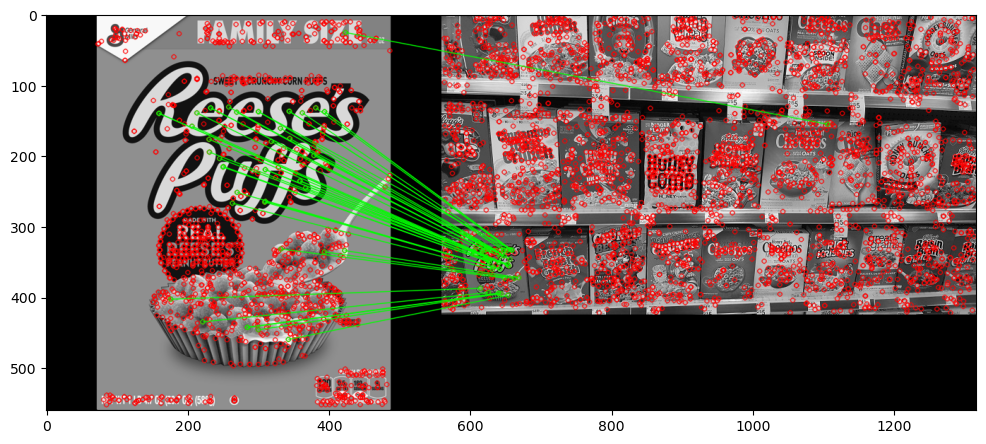

In [106]:
display(flann_matches)